In [1]:
import numpy as np
import pandas as pd
from keras.layers import Dense, Dropout, Activation, LSTM, Convolution1D, MaxPooling1D
from keras.models import Sequential
import matplotlib.pyplot as plt
%matplotlib inline

Using Theano backend.


In [2]:
## Data preparation

In [3]:
data= pd.read_csv('/Users/arshiyaaggarwal/Desktop/Fms_Project/code/data/^DJI.csv')
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
4271,2017-11-27,23552.859375,23638.919922,23545.019531,23580.779297,23580.779297,296320000
4272,2017-11-28,23625.189453,23849.609375,23617.109375,23836.710938,23836.710938,319240000
4273,2017-11-29,23883.259766,23959.759766,23872.589844,23940.679688,23940.679688,401410000
4274,2017-11-30,24013.800781,24327.820313,24013.800781,24272.349609,24272.349609,488200000
4275,2017-12-01,24305.400391,24322.060547,23921.900391,24231.589844,24231.589844,417910000


In [4]:
data= data.dropna(axis=0)
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
4271,2017-11-27,23552.859375,23638.919922,23545.019531,23580.779297,23580.779297,296320000
4272,2017-11-28,23625.189453,23849.609375,23617.109375,23836.710938,23836.710938,319240000
4273,2017-11-29,23883.259766,23959.759766,23872.589844,23940.679688,23940.679688,401410000
4274,2017-11-30,24013.800781,24327.820313,24013.800781,24272.349609,24272.349609,488200000
4275,2017-12-01,24305.400391,24322.060547,23921.900391,24231.589844,24231.589844,417910000


In [5]:
data= data.values[:, 1:5]
print data.shape

(4276, 4)


In [6]:
print data[:6, :]

[[10377.330078 10604.459961 10319.30957 10560.950195]
 [10576.780273 10917.299805 10576.780273 10898.719727]
 [10896.139648 10896.139648 10620.860352 10664.379883]
 [10644.660156 10689.019531 10583.230469 10617.360352]
 [10632.139648 10803.540039 10631.860352 10712.910156]
 [10719.360352 10792.160156 10670.05957 10725.799805]]


In [7]:
y= data[1:, 3]
print y.shape
X= data[:4275,:]
print X.shape

(4275,)
(4275, 4)


In [8]:
y= (y- min(y))/(max(y)- min(y))

In [9]:
print y[4270:]
print y[:7]

[0.9609839991623761 0.9754227755909837 0.9812883322331646 1.0
 0.9977004752838762]
[0.2455061392540156 0.2322854972004963 0.2296328181756039
 0.2350234070545823 0.23575059639087165 0.23814659118191125
 0.23962306262608365]


In [10]:
X= (X- np.min(X,axis=0))/(np.max(X, axis=0)-np.min(X,axis=0))
print X.shape
print X[:3, :]

(4275, 4)
[[0.2192915864574453 0.22106956373653716 0.2194135977236257
  0.22645035256860355]
 [0.23071040945868904 0.23882618237200137 0.23408943537613414
  0.2455061392540156]
 [0.24899421297621796 0.2376251434208518 0.23660200117712055
  0.2322854972004963]]


In [11]:
##LSTM input layer preparation

In [12]:
time_steps= 100
X_new= np.zeros((X.shape[0] - time_steps +1, 100, X.shape[1]))
y_new= np.zeros((y.shape[0] -time_steps +1,))
for ix in range(X_new.shape[0]):
    for jx in range(time_steps):
        X_new[ix, jx, :]= X[ix +jx, :]
    y_new[ix]= y[ix + time_steps -1]
print X_new.shape, y_new.shape

(4176, 100, 4) (4176,)


In [13]:
## split into train and test sets

In [14]:
split = int(0.8*data.shape[0])
X_train = X_new[:split]
X_test = X_new[split:]

y_train = y_new[:split]
y_test = y_new[split:]

print X_train.shape, y_train.shape
print X_test.shape, y_test.shape

(3420, 100, 4) (3420,)
(756, 100, 4) (756,)


In [15]:
## Model fitting

In [16]:
model = Sequential()
model.add(LSTM(100, input_shape= (100,4), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(output_dim=1))
model.add(Activation('linear'))

model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
lstm_1 (LSTM)                    (None, 100, 100)      42000       lstm_input_1[0][0]               
____________________________________________________________________________________________________
dropout_1 (Dropout)              (None, 100, 100)      0           lstm_1[0][0]                     
____________________________________________________________________________________________________
lstm_2 (LSTM)                    (None, 50)            30200       dropout_1[0][0]                  
____________________________________________________________________________________________________
dropout_2 (Dropout)              (None, 50)            0           lstm_2[0][0]                     
___________________________________________________________________________________________

In [17]:
model.compile(loss='mse', optimizer='rmsprop', metrics=['accuracy'])

/usr/local/lib/python2.7/site-packages/theano/tensor/basic.py:2146: UserWarning: theano.tensor.round() changed its default from `half_away_from_zero` to `half_to_even` to have the same default as NumPy. Use the Theano flag `warn.round=False` to disable this warning.
  "theano.tensor.round() changed its default from"


In [18]:
model.fit(X_train, y_train, batch_size=256, nb_epoch=50, validation_data = (X_test, y_test), verbose=2)

Train on 3420 samples, validate on 756 samples
Epoch 1/50
19s - loss: 0.0558 - acc: 2.9240e-04 - val_loss: 0.0123 - val_acc: 0.0013
Epoch 2/50
18s - loss: 0.0052 - acc: 2.9240e-04 - val_loss: 0.0043 - val_acc: 0.0013
Epoch 3/50
18s - loss: 0.0055 - acc: 2.9240e-04 - val_loss: 0.0022 - val_acc: 0.0013
Epoch 4/50
16s - loss: 0.0044 - acc: 2.9240e-04 - val_loss: 0.0026 - val_acc: 0.0013
Epoch 5/50
18s - loss: 0.0044 - acc: 2.9240e-04 - val_loss: 0.0014 - val_acc: 0.0013
Epoch 6/50
18s - loss: 0.0031 - acc: 2.9240e-04 - val_loss: 0.0061 - val_acc: 0.0013
Epoch 7/50
16s - loss: 0.0027 - acc: 2.9240e-04 - val_loss: 0.0123 - val_acc: 0.0013
Epoch 8/50
16s - loss: 0.0022 - acc: 2.9240e-04 - val_loss: 0.0232 - val_acc: 0.0013
Epoch 9/50
16s - loss: 0.0022 - acc: 2.9240e-04 - val_loss: 0.0204 - val_acc: 0.0013
Epoch 10/50
15s - loss: 0.0019 - acc: 2.9240e-04 - val_loss: 0.0160 - val_acc: 0.0013
Epoch 11/50
16s - loss: 0.0020 - acc: 2.9240e-04 - val_loss: 0.0051 - val_acc: 0.0013
Epoch 12/50
16s 

In [19]:
score= model.evaluate(X_test, y_test, batch_size=256)

756/756 [==============================] - 0s     


In [20]:
print score

[0.00028648800860287216, 0.0013227512488368327]


In [21]:
y_pred= model.predict(X_test)

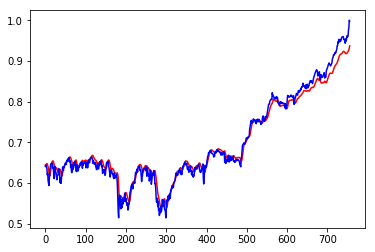

In [22]:
plt.plot(y_pred, 'r-')
plt.plot(y_test, 'b-')
plt.show()

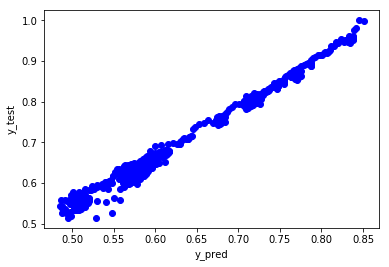

In [153]:
plt.plot (y_pred, y_test, 'bo')
plt.xlabel('y_pred')
plt.ylabel('y_test')
plt.show()